## Install yolov9

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Total 325 (delta 0), reused 0 (delta 0), pack-reused 325 (from 1)
Receiving objects: 100% (325/325), 2.25 MiB | 1.64 MiB/s, done.
Resolving deltas: 100% (162/162), done.
/content/yolov9
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 67.3 MB/s eta 0:00:00


In [ ]:
import torch
from IPython.display import Image, clear_output
from utils.downloads import attempt_download

## print setup
print('Setup complete, Using torch', (torch.__version__,torch.cuda.get_device_properties(0)))

Setup complete, Using torch ('2.5.1+cu121', _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15102MB, multi_processor_count=40, uuid=08f28c3c-9ca0-2e2b-7d9d-1e242b2abc78, L2_cache_size=4MB))



## Download Dataset

In [ ]:
!pip install roboflow

In [ ]:
from roboflow import Roboflow
from dotenv import load_dotenv
import os

load_dotenv()


API_KEY = os.getenv('API_KEY')
rf = Roboflow(api_key=API_KEY)
project = rf.workspace('digital-meter-recognisation').project('number-detection-for-v9')
version = project.version(9)
dataset = version.download('yolov9')

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to number-detection-for-v9-9 in yolov9:: 100%|██████████| 6270/6270 [00:02<00:00, 2322.01it/s]


In [ ]:
%cd /content/drive/MyDrive/AMR/yolov9

/content/drive/MyDrive/AMR/yolov9


## Download Model Weights

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

# Train Model On Custom Dataset

In [ ]:
!python train.py \
--batch 16 --epochs 25 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data /content/drive/MyDrive/AMR/yolov9/number-detection-for-v9-9/data.yaml \
--weights /content/drive/MyDrive/AMR/yolov9/weights/gelan-c.pt \
--cfg /content/drive/MyDrive/AMR/yolov9/models/detect/gelan-c.yaml \
--hyp /content/drive/MyDrive/AMR/yolov9/data/hyps/hyp.scratch-high.yaml

2024-12-21 17:44:07.408504: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-21 17:44:07.430271: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-21 17:44:07.436703: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-21 17:44:07.452953: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-21 17:44:08.905188: W tensorflow/compiler/tf2

## Metrics & Accuracy

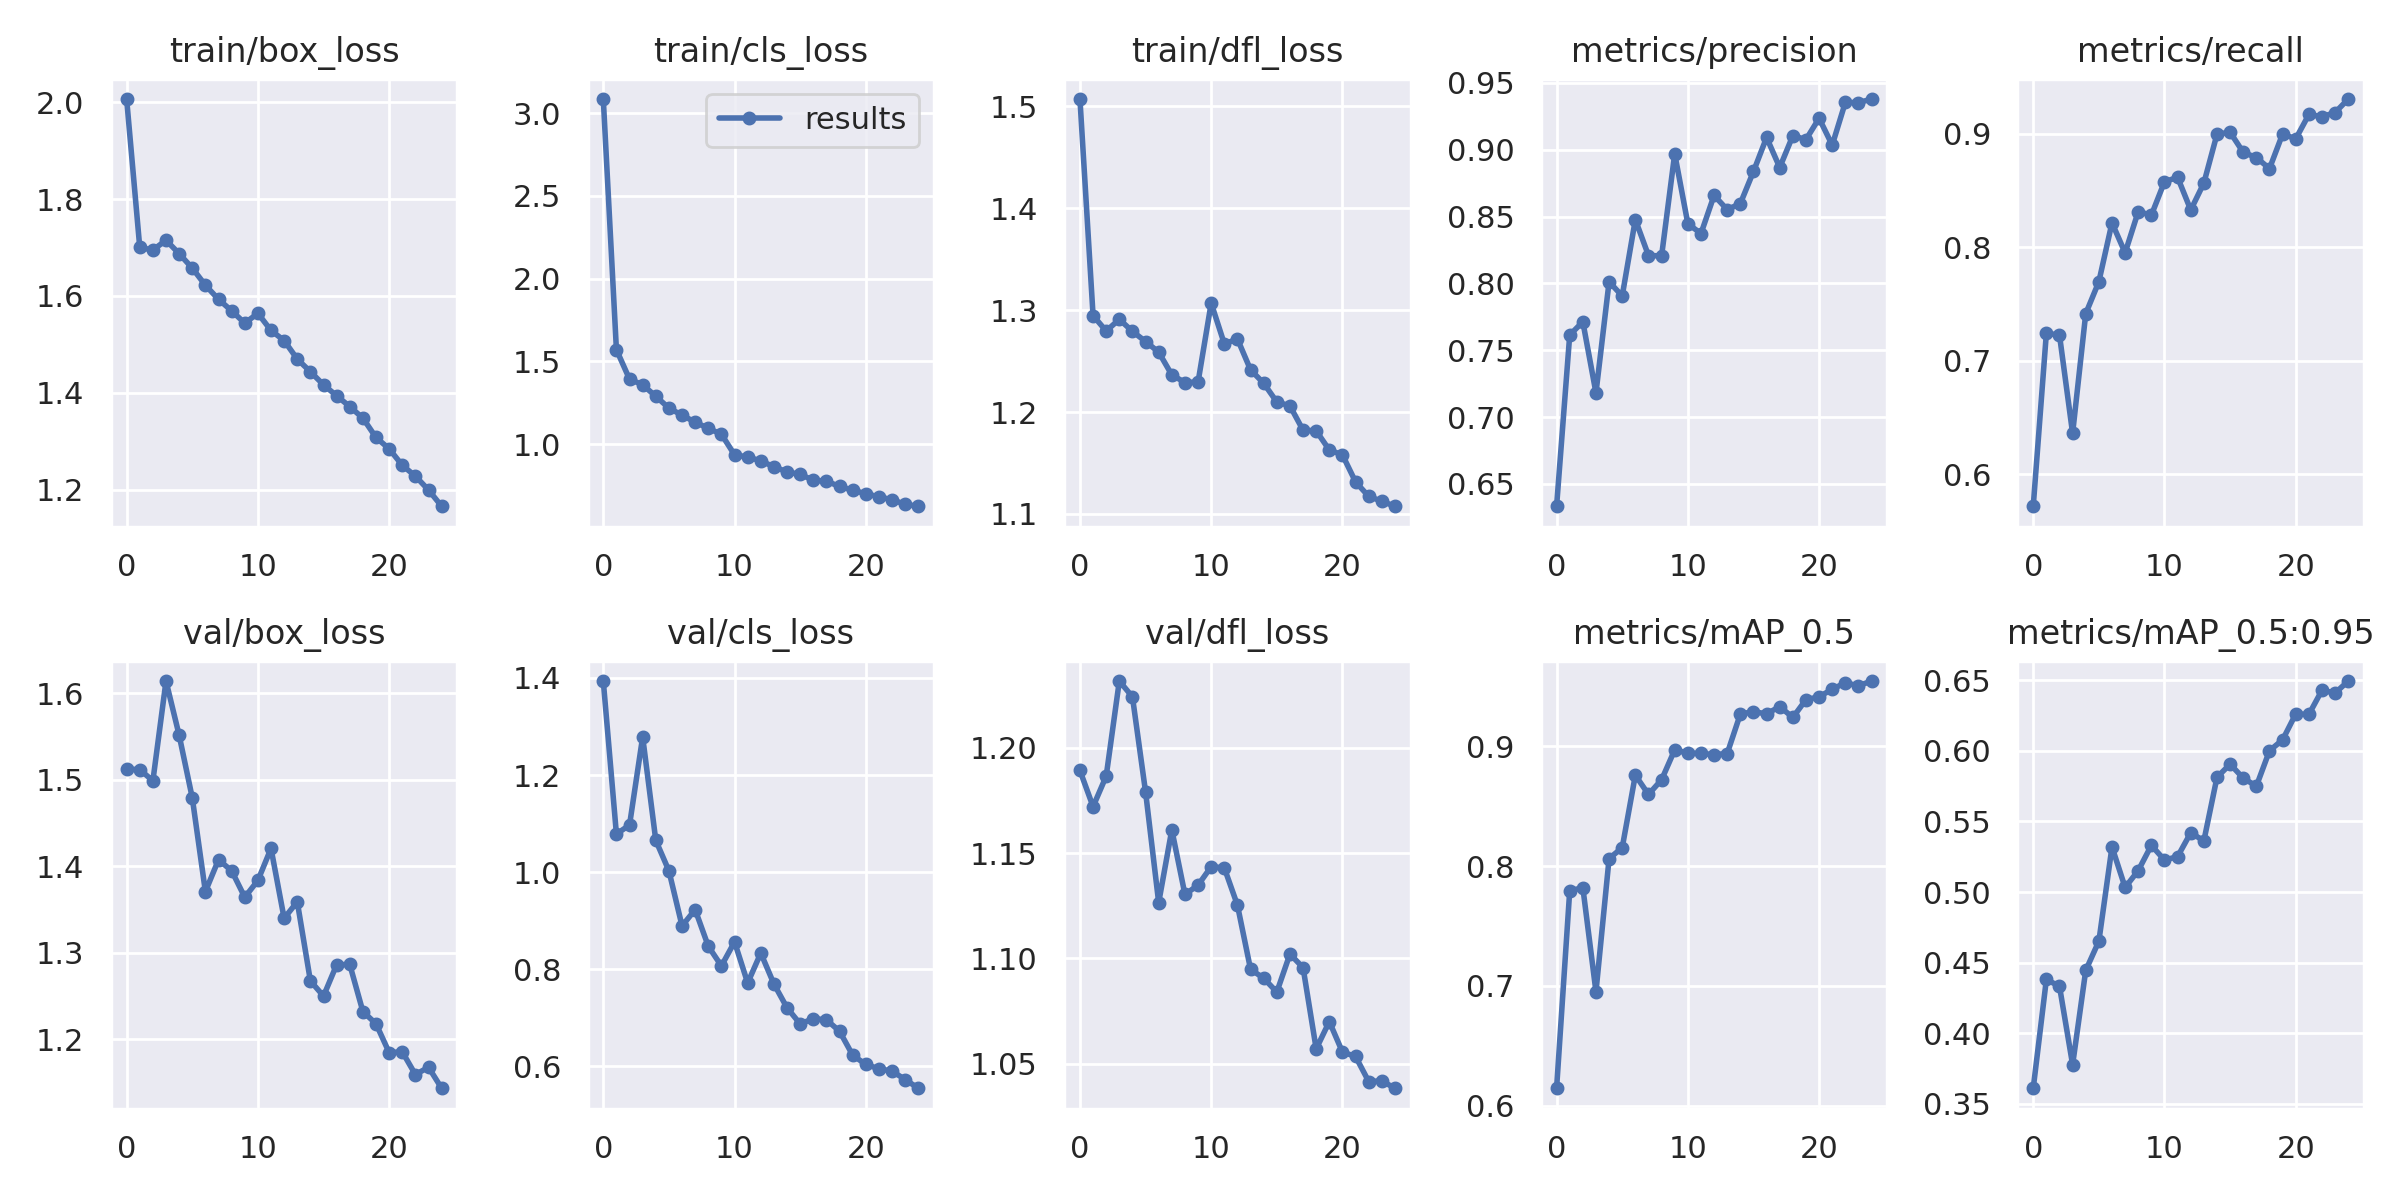

In [ ]:
Image(filename='/content/drive/MyDrive/AMR/yolov9/runs/train/exp2/results.png',width=1000)

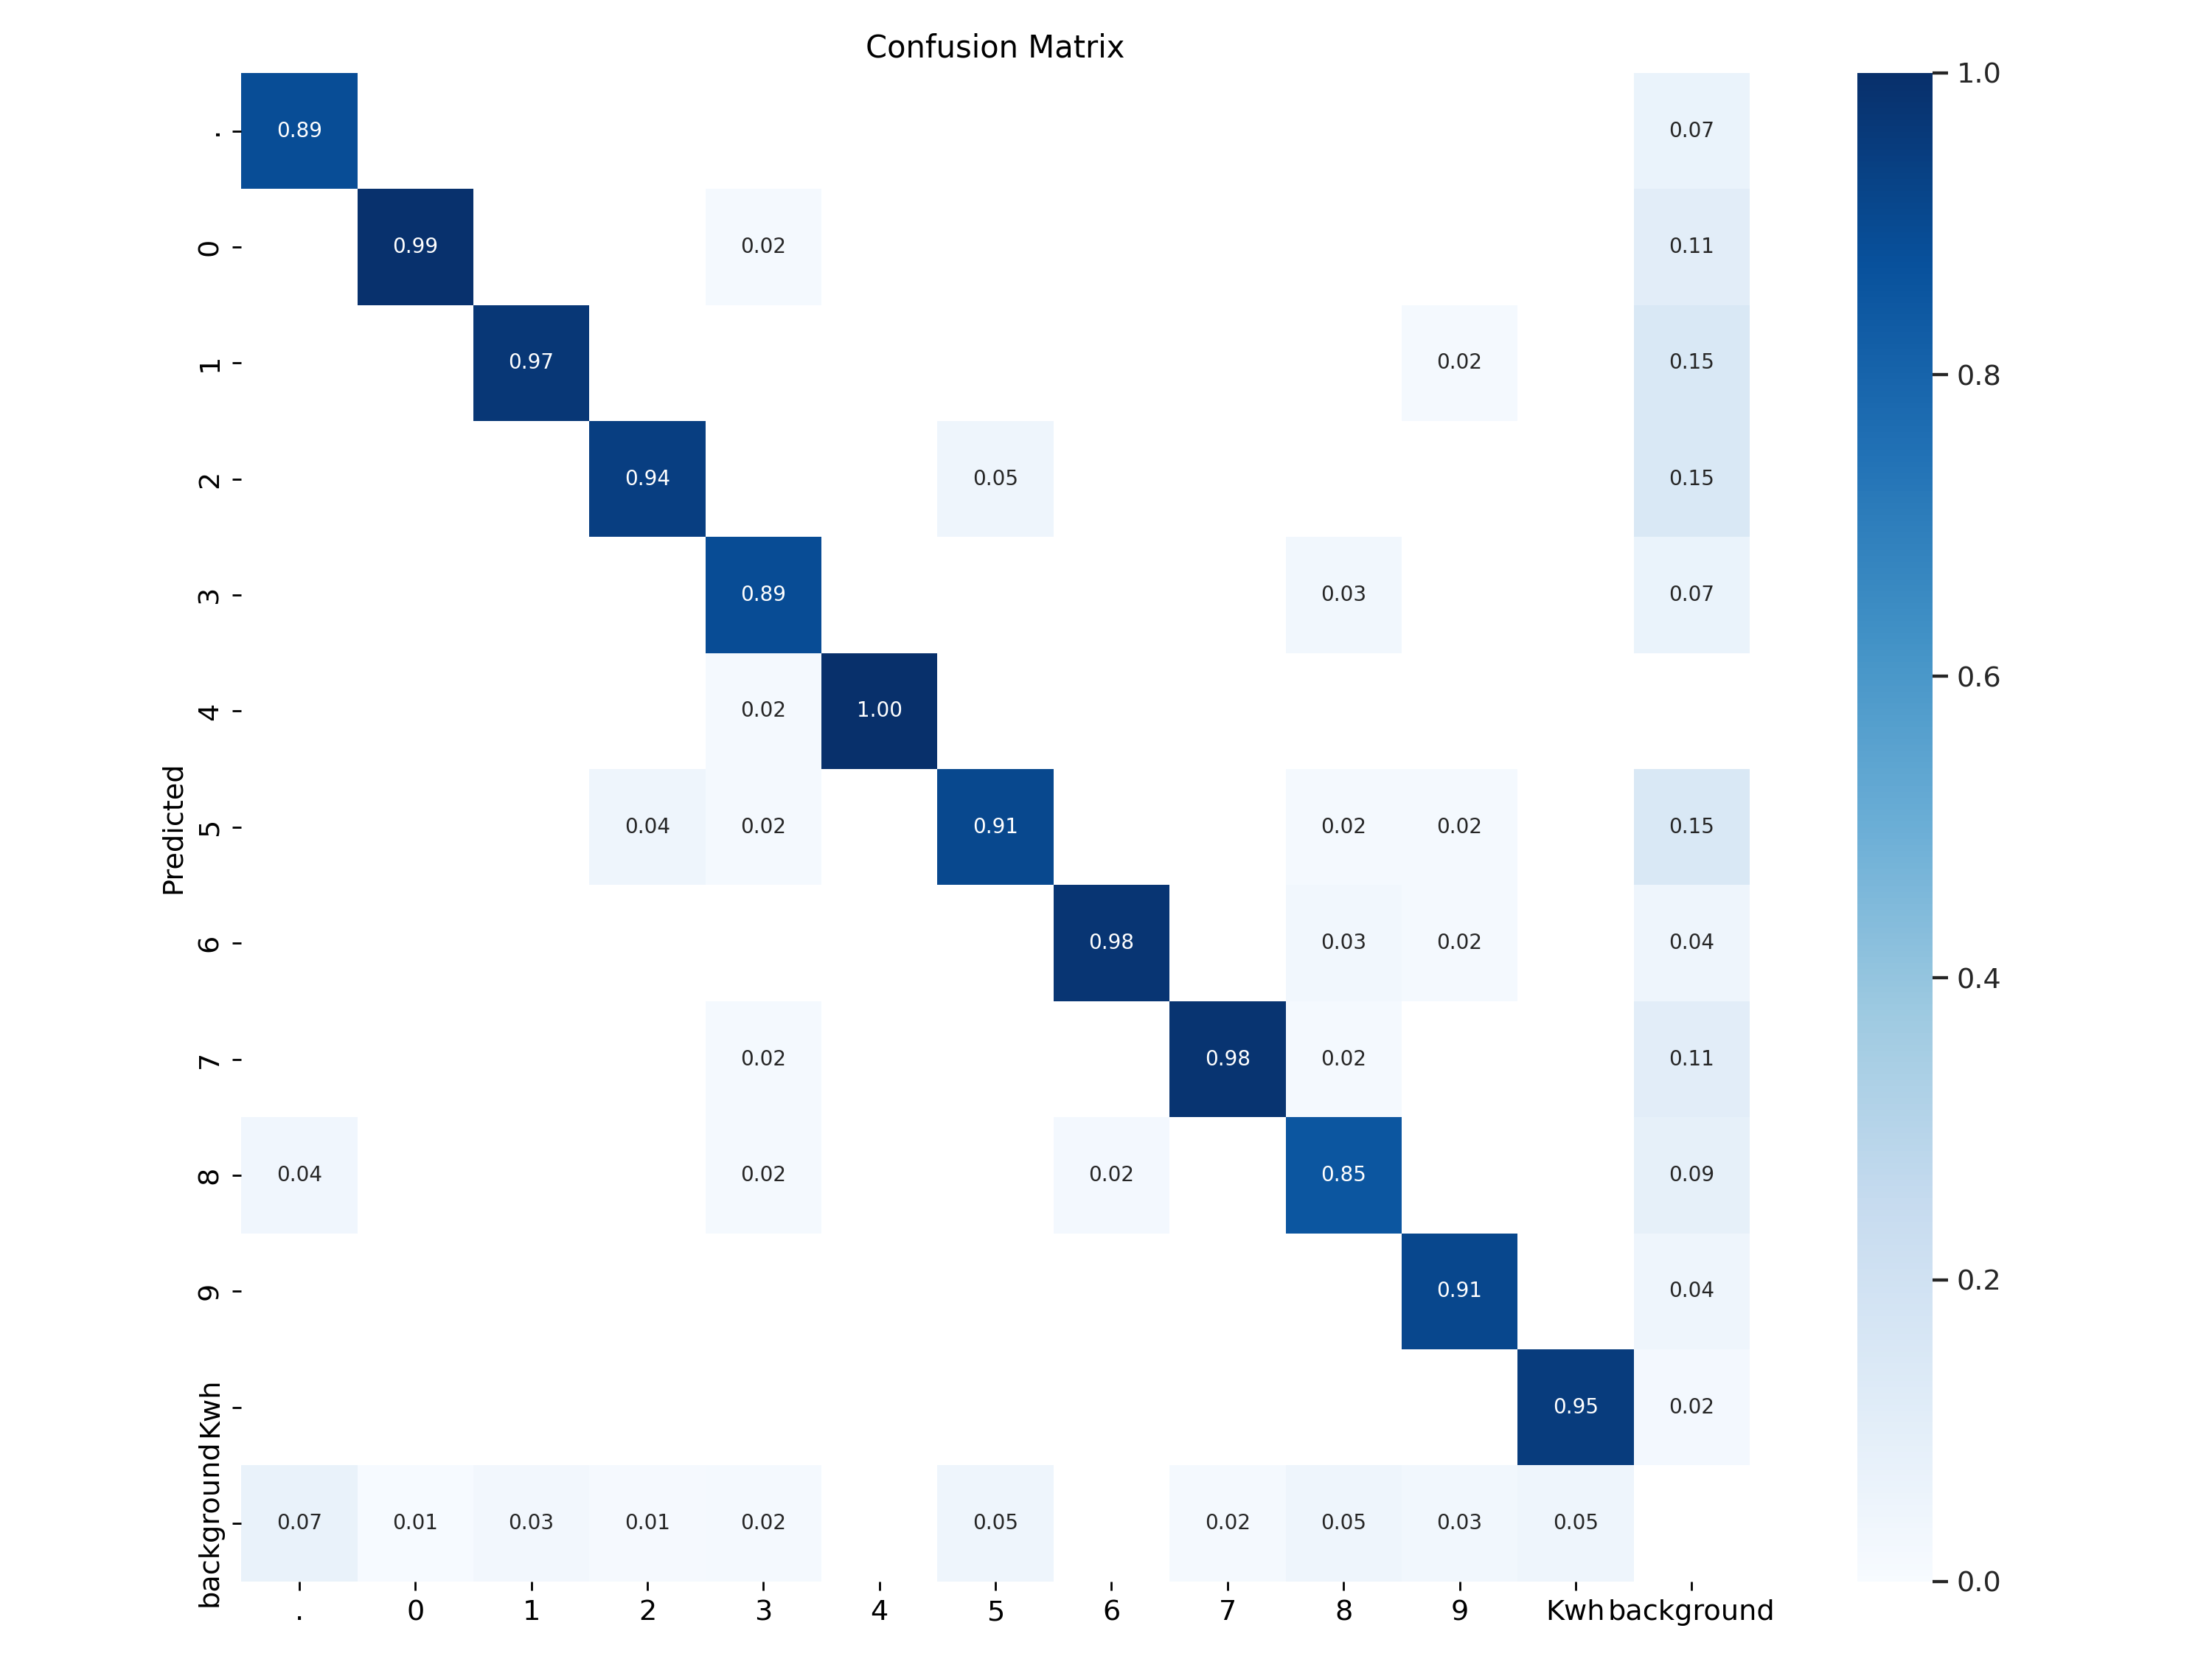

In [ ]:
Image(filename='/content/drive/MyDrive/AMR/yolov9/runs/train/exp2/confusion_matrix.png',width=1000)

## VAlidate Model

In [ ]:
!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data  /content/drive/MyDrive/AMR/yolov9/number-detection-for-v9-9/data.yaml \
--weights /content/drive/MyDrive/AMR/yolov9/runs/train/exp2/weights/best.pt

val: data=/content/yolov9/number-detection-for-v9-9/data.yaml, weights=['/content/yolov9/runs/train/exp2/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the function

## Predictions

In [ ]:
!python detect.py --weights /content/drive/MyDrive/AMR/yolov9/runs/train/exp2/weights/best.pt --conf 0.3 --source /content/drive/MyDrive/AMR/yolov9/number-detection-for-v9-9/valid/images/12_jpg.rf.57e0214cc522359d1e58b2d0aec54a61.jpg  --device 0

detect: weights=['/content/yolov9/runs/train/exp2/weights/best.pt'], source=/content/yolov9/number-detection-for-v9-9/valid/images/12_jpg.rf.57e0214cc522359d1e58b2d0aec54a61.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.3, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

/content/yolov9/models/experimental.py:75: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURI

## Show Result

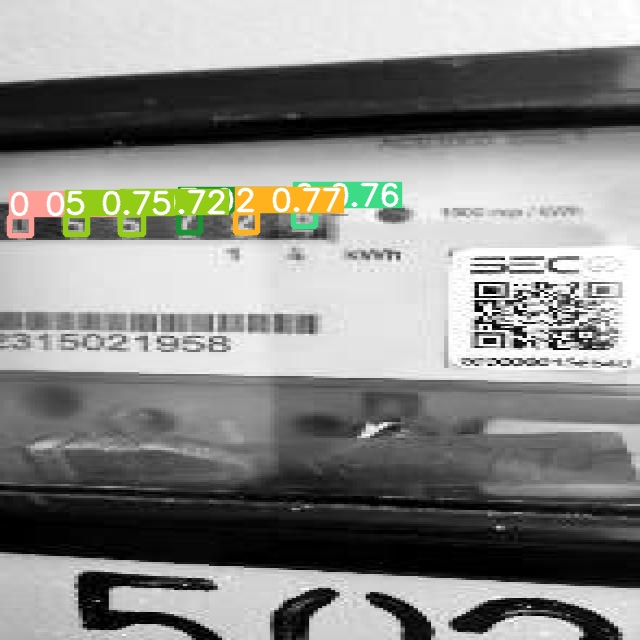

In [ ]:
Image(filename='/content/drive/MyDrive/AMR/yolov9/runs/detect/exp/12_jpg.rf.57e0214cc522359d1e58b2d0aec54a61.jpg',width=1000)

## Deploy Model

In [ ]:
!pip install -q inference supervision

In [ ]:
%cd /content/drive/MyDrive/yolov9/

/content/drive/.shortcut-targets-by-id/1-Uwf7Hj96JlxOCSztjtL8C677woAXrte/yolov9


In [ ]:
!pip install roboflow --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.9 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


## Deploy Model On Roboflow

In [ ]:
from roboflow import Roboflow
from dotenv import load_dotenv
import os

load_dotenv()




rf = Roboflow(api_key='5QdilruHnN7mLFVfWajv')

project = rf.workspace("digitalmeterrecognisation").project("number-detection-for-v9-n8bfo")
version = project.version(1)

version.deploy(model_type='yolov9',model_path='/content/drive/MyDrive/yolov9/runs/train/exp2')

loading Roboflow workspace...
loading Roboflow project...
View the status of your deployment at: https://app.roboflow.com/digitalmeterrecognisation/number-detection-for-v9-n8bfo/1
Share your model with the world at: https://universe.roboflow.com/digitalmeterrecognisation/number-detection-for-v9-n8bfo/model/1


## Test Model Here : https://universe.roboflow.com/digitalmeterrecognisation/number-detection-for-v9-n8bfo/model/1

In [ ]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.9/422.9 kB 32.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 59.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 286.8/286.8 kB 22.4 MB/s eta 0:00:00


In [ ]:
!pip install inference

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.7/105.7 kB 4.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.5/907.5 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 50.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 85.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.9/891.9 kB 54.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.0/64.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 47.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.9 MB/s et

In [ ]:
import cv2#imports opencv libraries
import numpy as np
import easyocr
import matplotlib as mpl
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
from PIL import Image

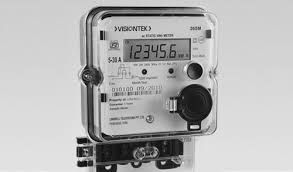

In [ ]:
image_path = '/content/electric-meter-1561030397-4962854.jpeg'

image = cv2.imread(image_path,0)
cv2_imshow(image)

In [ ]:
def preprocess(image):
  sharpen_kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
  sharpen = cv2.filter2D(image,-1,sharpen_kernel)
  adjusted = cv2.convertScaleAbs(sharpen,alpha=1.5,beta=10)
  return adjusted

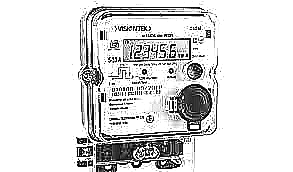

In [ ]:
new_img = preprocess(image)
cv2_imshow(new_img)

In [ ]:
from inference_sdk import InferenceHTTPClient

In [ ]:
client = InferenceHTTPClient(
    api_url = 'https://detect.roboflow.com',
    api_key = '5QdilruHnN7mLFVfWajv'
    )

results = client.infer(image,model_id = 'number-detection-for-v9-n8bfo/1')


In [ ]:
# Get the predictions from the result
predictions = results['predictions']
white_background = np.full_like(image, (255), dtype=np.uint8)    #makes a custom white coloured background for better presentation
# Loop through the predictions and draw bounding boxes
for prediction in predictions:
    # Get the bounding box coordinates
    x = int(prediction['x'])
    y = int(prediction['y'])
    width = int(prediction['width'])
    height = int(prediction['height'])

    # Draw the bounding box on the image
    cv2.rectangle(new_img, (x-int(width/2), y-int(height/2)), (x + int(width/2), y + int(height/2)), (0, 0, 255), 2)
    # Get the class ID
    class_id = prediction['class']
    # Print the class name on top of the bounding box
    cv2.putText(new_img, class_id, (x-int(height), y-int(width)), cv2.FONT_HERSHEY_SIMPLEX, .7, (0, 0, 0), 2)
    cv2.putText(white_background, class_id, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2) #puts the text also on the white background for later purpose

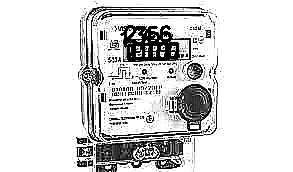

In [ ]:
cv2_imshow(new_img)

In [ ]:
import numpy as np
import cv2

def prediction_on_image(image_path):
  #read image
  image = cv2.imread(image_path,0)
  ## pre-processing image
  sharpen_kernel = np.array([[-1,-1,-1],[-1,9,-1],[-1,-1,-1]])
  sharpen = cv2.filter2D(image,-1,sharpen_kernel)
  adjusted = cv2.convertScaleAbs(sharpen,alpha=1.5,beta=10)
  new_img = adjusted
  ## load model from roboflow
  client = InferenceHTTPClient(
    api_url = 'https://detect.roboflow.com',
    api_key = '5QdilruHnN7mLFVfWajv'
    )

  results = client.infer(image,model_id = 'number-detection-for-v9-n8bfo/1')

  predictions = results['predictions']
  white_background = np.full_like(image, (255), dtype=np.uint8)
  for prediction in predictions:
    # Get the bounding box coordinates
    x = int(prediction['x'])
    y = int(prediction['y'])
    width = int(prediction['width'])
    height = int(prediction['height'])
    text = str(prediction['class'])

    print(text,end=' ')


    cv2.rectangle(new_img, (x-int(width/2), y-int(height/2)), (x + int(width/2), y + int(height/2)), (0, 0, 255), 2)
    # Get the class ID
    class_id = prediction['class']
    # Print the class name on top of the bounding box
    cv2.putText(new_img, class_id, (x-int(height), y-int(width)), cv2.FONT_HERSHEY_SIMPLEX, .7, (0, 0, 0), 2)
    cv2.putText(white_background, class_id, (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 0), 2)


  return new_img


## Predictions

4 5 2 6 3 1 . 

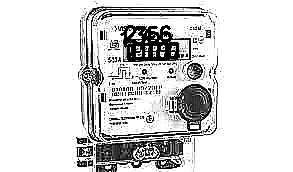

In [ ]:
output_img = prediction_on_image('/content/electric-meter-1561030397-4962854.jpeg')
cv2_imshow(output_img)

8 8 8 8 8 8 8 

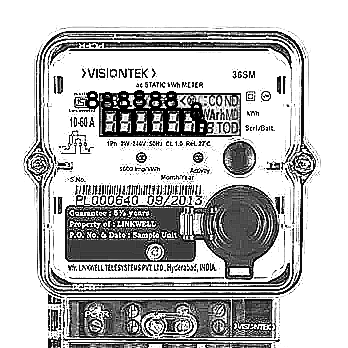

In [ ]:
output_img = prediction_on_image('/content/electronic-meters-visiontek-500x500.webp')
cv2_imshow(output_img)

0 0 0 0 0 1 Kwh 

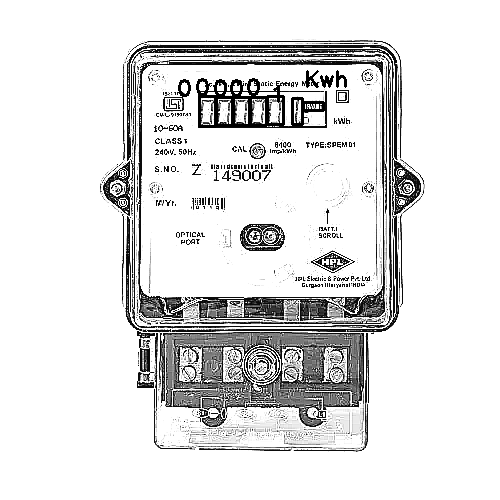

In [ ]:
output_img = prediction_on_image('/content/single-phase-digital-meter-500x500.webp')
cv2_imshow(output_img)

0 0 0 4 0 3 

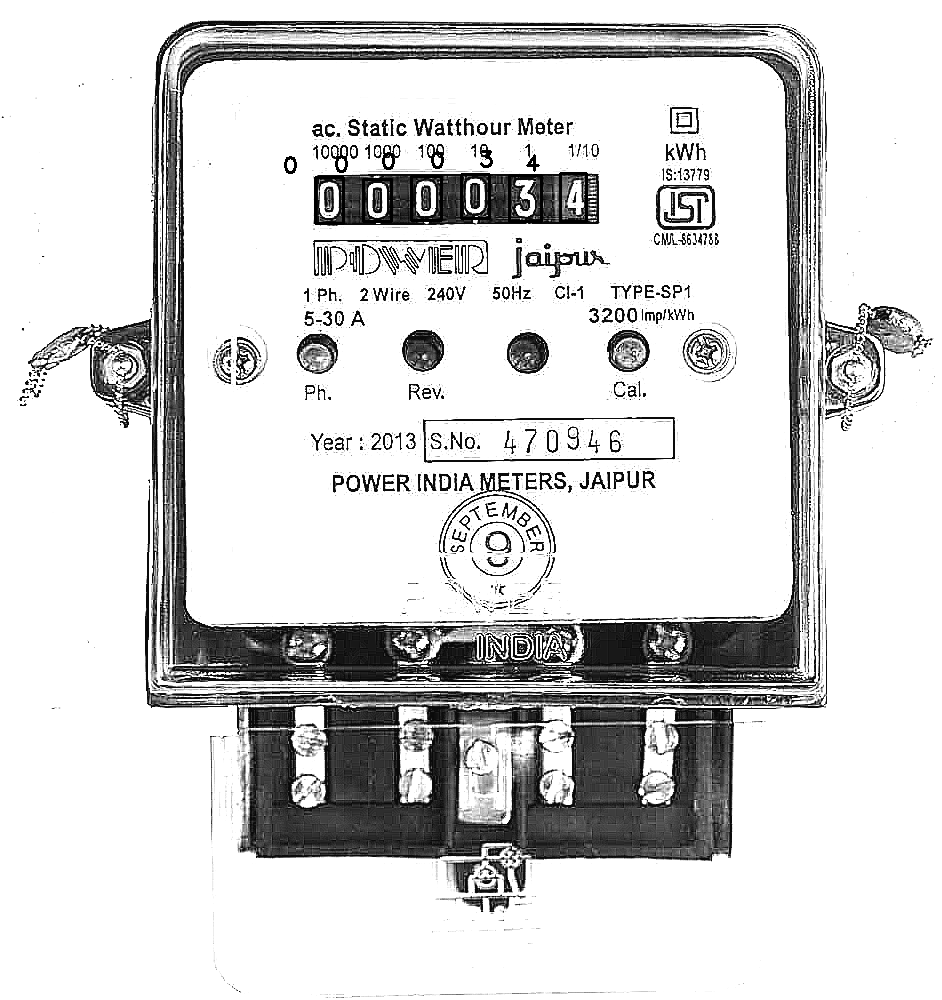

In [ ]:
output_img = prediction_on_image('/content/71D3bz0MGBL._AC_UF1000,1000_QL80_.jpg')
cv2_imshow(output_img)